# NLProc Tasks with Jieba

By [Allison Parrish](http://www.decontextualize.com/)

This is a very basic guide to breaking down Chinese text into words and parts of speech with [Jieba](https://github.com/fxsjy/jieba). Make sure you've installed Jieba first (with `pip`, use `pip install jieba`; with Anaconda, try `conda install jieba`). Then import the library:

In [13]:
import jieba

Jieba's `cut()` function splits a text into words. By default, it returns a Python "generator," which means that we need to explicitly convert the result to a list.

In [16]:
list(jieba.cut("我爱我的妹妹"))

['我', '爱', '我', '的', '妹妹']

In [19]:
list(jieba.cut("我是美国"))

['我', '是', '美国']

This is different from just splitting the text up into characters:

In [22]:
list("我是美国")

['我', '是', '美', '国']

The following code reads in an entire text file and splits it into words. 

In [23]:
words = list(jieba.cut(open("./xu_zhimo.txt").read()))

In [28]:
words[:50]

['雪花',
 '的',
 '快乐',
 '\n',
 '\n',
 '假若',
 '我',
 '是',
 '一朵',
 '雪花',
 '，',
 '\n',
 '翩翩',
 '的',
 '在',
 '半空',
 '里',
 '潇洒',
 '，',
 '\n',
 '我',
 '一定',
 '认清',
 '我',
 '的',
 '方向',
 '\n',
 '—',
 '—',
 '飞扬',
 '，',
 '飞扬',
 '，',
 '飞扬',
 '，',
 '\n',
 '这',
 '地面',
 '上',
 '有',
 '我',
 '的',
 '方向',
 '。',
 '\n',
 '\n',
 '不去',
 '那',
 '冷寞',
 '的']

With this list, we can do a quick count to find the most common words:

In [29]:
from collections import Counter
c = Counter(words)

In [31]:
c.most_common(25)

[('\n', 585),
 ('，', 332),
 ('的', 281),
 ('我', 134),
 ('你', 86),
 ('在', 84),
 (' ', 62),
 ('！', 59),
 ('。', 56),
 ('—', 54),
 ('是', 51),
 ('了', 47),
 ('；', 36),
 ('－', 33),
 ('这', 27),
 ('着', 25),
 ('她', 24),
 ('那', 23),
 ('一个', 22),
 ('里', 21),
 ('─', 18),
 ('有', 17),
 ('不', 17),
 ('上', 16),
 ('也', 16)]

You can see that the algorithm also picks out punctuation as words, which isn't ideal. We can improve the analysis a little bit by using the `.isalpha()` method on string values, which returns `True` if the string contains only non-punctuation characters:

In [36]:
filtered_words = [w for w in words if w.isalpha()]

In [38]:
filtered_words[:10]

['雪花', '的', '快乐', '假若', '我', '是', '一朵', '雪花', '翩翩', '的']

Now the count will seem a bit more accurate:

In [40]:
c = Counter(filtered_words)

In [42]:
c.most_common(25)

[('的', 281),
 ('我', 134),
 ('你', 86),
 ('在', 84),
 ('是', 51),
 ('了', 47),
 ('这', 27),
 ('着', 25),
 ('她', 24),
 ('那', 23),
 ('一个', 22),
 ('里', 21),
 ('有', 17),
 ('不', 17),
 ('上', 16),
 ('也', 16),
 ('似的', 14),
 ('与', 14),
 ('中', 12),
 ('知道', 11),
 ('方向', 10),
 ('明星', 10),
 ('风', 10),
 ('恋爱', 10),
 ('飞扬', 9)]

## Parts of speech

Jieba also includes a part-of-speech tagger: the `cut()` function in Jieba's `posseg` module. Here's an example of how to use the tagger:

In [72]:
import jieba.posseg as pseg

In [73]:
tagged = list(pseg.cut(open("./xu_zhimo.txt").read()))

In [74]:
for item in tagged[:50]:
    print(item.word, item.flag)

雪花 n
的 uj
快乐 a

 x

 x
假若 c
我 r
是 v
一朵 m
雪花 n
， x

 x
翩翩 nr
的 uj
在 p
半空 n
里 f
潇洒 a
， x

 x
我 r
一定 d
认清 v
我 r
的 uj
方向 n

 x
— x
— x
飞扬 v
， x
飞扬 v
， x
飞扬 v
， x

 x
这 r
地面 n
上有 v
我 r
的 uj
方向 n
。 x

 x

 x
不 d
去 v
那 r
冷寞 a
的 uj


The POS-tagging version of the `cut()` function returns a list of objects that have a `.word` attribute (containing the text of the word) and a `.flag` attribute, which has the part of speech. [Here's a list I believe to be accurate](https://github.com/fxsjy/jieba/issues/411#issuecomment-266689754) the gives the meanings of the tags.

Once the words have been tagged, we can make counters that tell us about the most frequent nouns:

In [55]:
nouns = [item.word for item in tagged if item.flag == "n"]

In [59]:
nouns[:25]

['雪花',
 '雪花',
 '半空',
 '方向',
 '地面',
 '方向',
 '幽谷',
 '山麓',
 '荒街',
 '方向',
 '半空',
 '飞舞',
 '住处',
 '身轻',
 '衣襟',
 '柔波',
 '心胸',
 '消溶',
 '消溶',
 '消溶',
 '柔波',
 '心胸',
 '残诗',
 '瓷',
 '花砖']

In [63]:
nouncount = Counter(nouns)

In [64]:
nouncount.most_common(25)

[('梦', 12),
 ('方向', 10),
 ('风', 10),
 ('心', 6),
 ('黑夜', 5),
 ('青草', 4),
 ('山', 4),
 ('玫瑰', 4),
 ('世界', 4),
 ('人间', 4),
 ('柔波', 3),
 ('心胸', 3),
 ('消溶', 3),
 ('人', 3),
 ('象', 3),
 ('水', 3),
 ('荒野', 3),
 ('水晶', 3),
 ('时', 3),
 ('亲吻', 3),
 ('火焰', 3),
 ('热情', 3),
 ('等候', 3),
 ('头', 3),
 ('命运', 3)]

In [66]:
verbs = [item.word for item in tagged if item.flag == "v"]

In [75]:
verbcount = Counter(verbs)
verbcount.most_common(25)

[('是', 56),
 ('有', 16),
 ('去', 11),
 ('来', 11),
 ('要', 11),
 ('知道', 11),
 ('恋爱', 10),
 ('飞扬', 9),
 ('看', 8),
 ('像是', 7),
 ('不能', 7),
 ('吹', 7),
 ('像', 6),
 ('说', 5),
 ('走', 5),
 ('望', 5),
 ('累坏', 4),
 ('爱', 4),
 ('跟着', 4),
 ('寻', 3),
 ('挂', 3),
 ('破碎', 3),
 ('希望', 3),
 ('开', 3),
 ('笑', 3)]

In [81]:
adjs = [item.word for item in tagged if item.flag == "a"]

In [86]:
adjcount = Counter(adjs)
adjcount.most_common(25)

[('痴', 5),
 ('自由', 4),
 ('全', 3),
 ('珍重', 3),
 ('忧愁', 3),
 ('沉默', 3),
 ('不易', 3),
 ('香', 3),
 ('凄清', 2),
 ('红', 2),
 ('惊醒', 2),
 ('浓密', 2),
 ('最好', 2),
 ('阔', 2),
 ('柔软', 2),
 ('欢欣', 2),
 ('柔情', 2),
 ('粗', 2),
 ('丑', 2),
 ('懦怯', 2),
 ('早', 2),
 ('快乐', 1),
 ('潇洒', 1),
 ('冷寞', 1),
 ('惆怅', 1)]

In [87]:
sounds = [item.word for item in tagged if item.flag == "o"]
soundcount = Counter(sounds)
soundcount.most_common(25)

[('飕飕', 1), ('啁啾', 1)]

Here's a very, very poor poetry generator based on this data:

In [131]:
import random
for i in range(15):
    print("".join([random.choice(nouns), random.choice(verbs), random.choice(nouns)]))

条爱树尖
热情是处
风雨无样儿
视觉起造瓷
踪影照亮风
风雨定笑
衣袖不能宇宙
荒野无比梢头
亲吻点染魂灵
水静止驱策
处没天神
眼角透宇宙
落花去心
细蕊撑地面
身轻发抖处


We can also use Pandas to do some elementary data visualization.

In [124]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('max_rows', 25)
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (10, 4)

To get Chinese characters to show up in Pandas plots, you need to find a font installed on your system that supports the full Unicode character set. On macOS:

In [125]:
plt.rcParams["font.sans-serif"] = ["Arial Unicode MS"]

I'll create a series with all of the nouns:

In [133]:
noun_series = pd.Series(nouns)

And then I can make a series with the most common nouns using `.value_counts()`:

In [128]:
top_fifteen = noun_series.value_counts()[:15]

In [134]:
top_fifteen

梦     12
方向    10
风     10
心      6
黑夜     5
山      4
世界     4
人间     4
玫瑰     4
青草     4
人      3
荒野     3
火焰     3
顽石     3
时      3
dtype: int64

Finally, let's draw a bar graph with the top fifteen most common nouns:

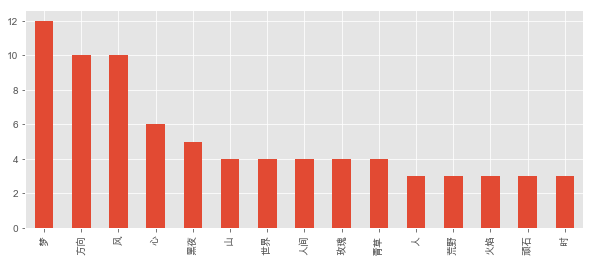

In [132]:
top_fifteen.plot(kind="bar")